In [22]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
#from feature_engine.preprocessing import Standerscaler

In [3]:
data = pd.read_csv("/content/Salary_Data.csv")


array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

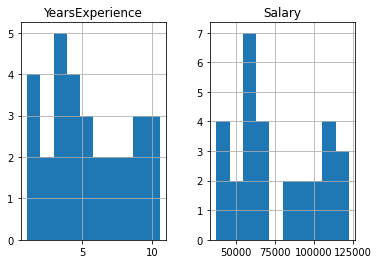

In [4]:
data.hist()


In [8]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
# it will show any null vlaues
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
#data this funtion show the how data was spread std,mean,max,min
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [12]:
#it will show how they are correlated we can use to see the scatter plot
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(-1.115000000000002, 0.5, 'salary')

<Figure size 864x864 with 0 Axes>

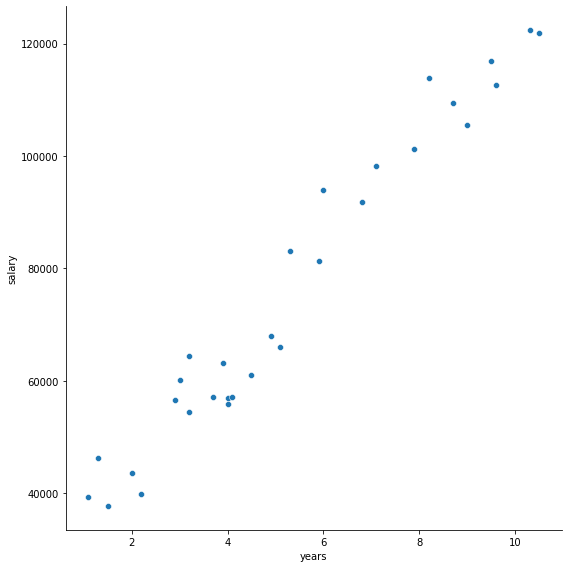

In [16]:
#we set some size to figure a plot
plt.figure(figsize=(12,12))
sns.pairplot(data,x_vars=["YearsExperience"],y_vars="Salary",kind="scatter",size=8)
plt.xlabel("years")
plt.ylabel("salary")

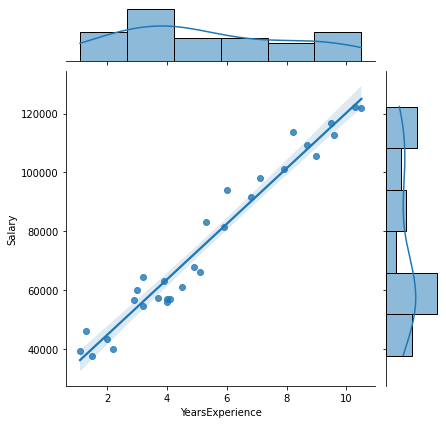

In [18]:
#preview show the how regresion line is 
sns.jointplot(x="YearsExperience",y="Salary",kind="reg",data=data)

In [27]:
#prepraing the data for learning
x_train,x_test,y_train,y_test = train_test_split(data.drop("Salary",axis=1),data["Salary"],test_size=0.1,random_state=45)
x_train.head()

,YearsExperience
5,2.9
13,4.1
9,3.7
29,10.5
7,3.2


In [28]:
#creating a new instances assinge the varabiles
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)

y_predict = linear_regression.predict(x_test)

y_predict

array([ 74634.72348191, 118045.17500771, 112257.11480427])

In [32]:
linear_regression.predict([[10.5]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([126727.26531287])

Text(0.5, 1.0, 'Actual vs. Predicted')

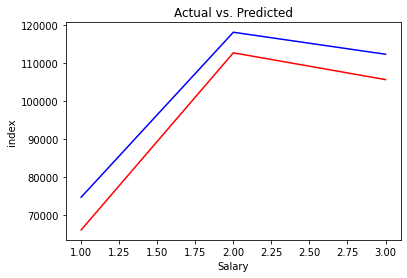

In [35]:
#plotting the actual and predicted values 
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_predict,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Actual vs. Predicted')

In [37]:
#intercept and coeff of the line 
print('Intercept of the model:',linear_regression.intercept_)
print('Coefficient of the line:',linear_regression.coef_)

#y=mx+c
#y=b0+b1c
#y = 25436 +9646.7x

Intercept of the model: 25436.211752660092
Coefficient of the line: [9646.76700573]
